In [88]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

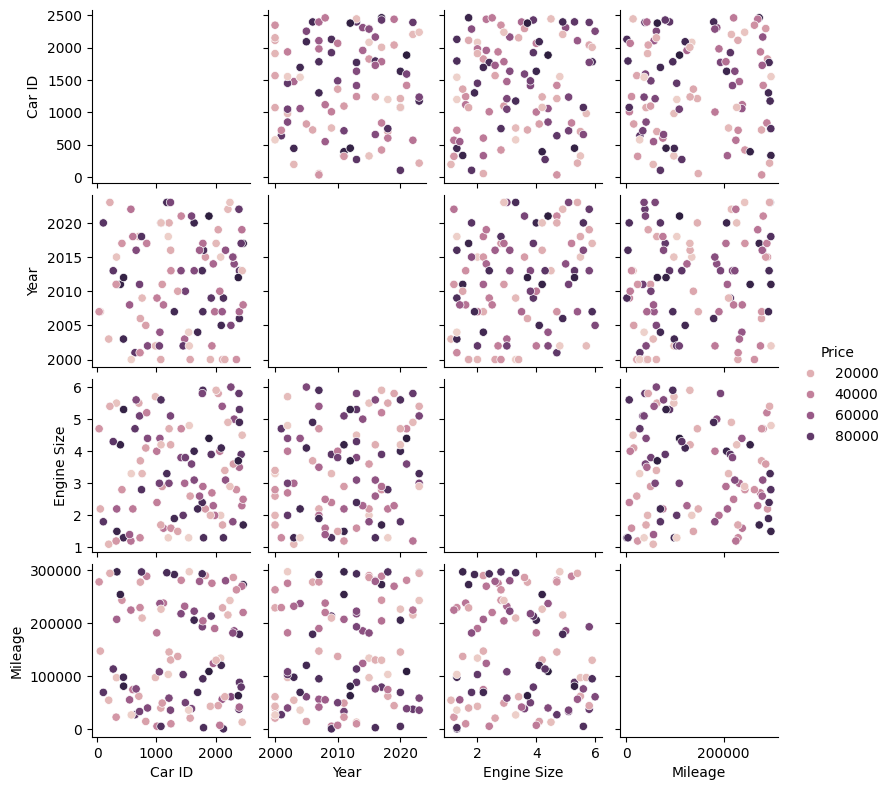

In [89]:
cardf = pd.read_csv('car_price_prediction.csv',sep=",")

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(cardf)), size=100, replace=False)
pairplot(cardf.iloc[indices], hue='Price', height=2)

In [90]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [91]:
X = cardf.drop(['Price','Car ID'],axis=1)

X = pd.get_dummies(X, columns=['Brand', 'Fuel Type','Transmission','Condition','Model'], drop_first=True,dtype=int).values

y = cardf['Price'].values

print(X[:,:3])

[[2.01600e+03 2.30000e+00 1.14832e+05]
 [2.01800e+03 4.40000e+00 1.43190e+05]
 [2.01300e+03 4.50000e+00 1.81601e+05]
 ...
 [2.02100e+03 1.10000e+00 2.72827e+05]
 [2.00200e+03 4.50000e+00 2.29164e+05]
 [2.00500e+03 4.60000e+00 8.09780e+04]]


In [92]:
y = y.reshape(-1,1)

print(y)

[[26613.92]
 [14679.61]
 [44402.61]
 ...
 [29902.45]
 [46085.67]
 [16594.14]]


In [93]:
X_norm = (X[:, :3] - X[:, :3].min(axis=0)) / (X[:, :3].max(axis=0) - X[:, :3].min(axis=0))

print(f"Here is X normalized part: \n{X_norm}")

X_cat = X[:,3:]

print(f"Here is X categorical part:\n{X_cat}")

X = np.hstack((X_norm,X_cat))

print(f"Here is X:\n{X}")

print(f"X Shape: {np.shape(X)}")

Here is X normalized part: 
[[0.69565217 0.26       0.38278458]
 [0.7826087  0.68       0.47732637]
 [0.56521739 0.7        0.60538353]
 ...
 [0.91304348 0.02       0.90951886]
 [0.08695652 0.7        0.76395223]
 [0.2173913  0.72       0.26991985]]
Here is X categorical part:
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Here is X:
[[0.69565217 0.26       0.38278458 ... 0.         0.         0.        ]
 [0.7826087  0.68       0.47732637 ... 0.         0.         0.        ]
 [0.56521739 0.7        0.60538353 ... 0.         0.         0.        ]
 ...
 [0.91304348 0.02       0.90951886 ... 0.         0.         0.        ]
 [0.08695652 0.7        0.76395223 ... 0.         0.         0.        ]
 [0.2173913  0.72       0.26991985 ... 1.         0.         0.        ]]
X Shape: (2500, 42)


In [94]:
y = (y - y.min(axis=0)) / (y.max(axis=0) - y.min(axis=0))

print(y)

[[0.22746499]
 [0.10180273]
 [0.4147709 ]
 ...
 [0.26209155]
 [0.43249267]
 [0.12196177]]


In [95]:
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)

print(f"Here is X training set:\n{X_trn}\n\nHere is X test set:\n{X_tst}")

Here is X training set:
[[0.2173913  0.48       0.24465915 ... 0.         0.         0.        ]
 [0.17391304 0.12       0.84086454 ... 0.         0.         0.        ]
 [0.08695652 0.96       0.2996046  ... 0.         0.         0.        ]
 ...
 [0.60869565 0.44       0.26877967 ... 1.         0.         0.        ]
 [0.47826087 0.76       0.02107337 ... 0.         0.         0.        ]
 [0.13043478 0.68       0.70719315 ... 0.         0.         0.        ]]

Here is X test set:
[[0.43478261 0.4        0.70627634 ... 0.         0.         0.        ]
 [0.86956522 0.68       0.06256334 ... 0.         0.         0.        ]
 [0.56521739 0.66       0.18513629 ... 1.         0.         0.        ]
 ...
 [0.43478261 0.56       0.67093735 ... 0.         0.         0.        ]
 [0.7826087  0.7        0.19491452 ... 0.         0.         0.        ]
 [0.39130435 0.48       0.84442177 ... 0.         0.         0.        ]]


In [96]:
print(f"Here is y training set:\n{y_trn}\n\nHere is y test set:\n{y_tst}")

Here is y training set:
[[0.97491264]
 [0.04423893]
 [0.89393872]
 ...
 [0.72645773]
 [0.09945939]
 [0.30926779]]

Here is y test set:
[[0.13144631]
 [0.74663246]
 [0.86829192]
 [0.08961979]
 [0.75874801]
 [0.36931381]
 [0.4441881 ]
 [0.5638299 ]
 [0.18972538]
 [0.28787417]
 [0.62498626]
 [0.80338296]
 [0.94693872]
 [0.45608895]
 [0.57190065]
 [0.85468592]
 [0.67384733]
 [0.20655583]
 [0.0170382 ]
 [0.21578325]
 [0.09950004]
 [0.47904968]
 [0.93430985]
 [0.70992548]
 [0.43125735]
 [0.37482505]
 [0.83353985]
 [0.79719888]
 [0.7265723 ]
 [0.85329076]
 [0.89368117]
 [0.02887072]
 [0.09893071]
 [0.78111318]
 [0.52299757]
 [0.47560232]
 [0.09957301]
 [0.4186148 ]
 [0.16000536]
 [0.53705255]
 [0.97911875]
 [0.35126583]
 [0.02541294]
 [0.79040272]
 [0.22273356]
 [0.12410631]
 [0.76165289]
 [0.4581024 ]
 [0.14152662]
 [0.80521993]
 [0.7007067 ]
 [0.01549352]
 [0.98654215]
 [0.89248923]
 [0.89827013]
 [0.2263935 ]
 [0.20653288]
 [0.5818425 ]
 [0.81442176]
 [0.23071944]
 [0.83508769]
 [0.5559202

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

model1 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='mse',
    metrics=['mae']
)

mod1 = model1.fit(X_trn, y_trn, epochs=200,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1726 - mae: 0.3373 - val_loss: 0.1052 - val_mae: 0.2740
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1010 - mae: 0.2703 - val_loss: 0.0942 - val_mae: 0.2619
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0878 - mae: 0.2543 - val_loss: 0.0917 - val_mae: 0.2598
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0818 - mae: 0.2454 - val_loss: 0.0893 - val_mae: 0.2558
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0809 - mae: 0.2444 - val_loss: 0.0904 - val_mae: 0.2589
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0765 - mae: 0.2381 - val_loss: 0.0893 - val_mae: 0.2560
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0754 - mae: 0.2372 - val_loss: 0.0906 - val_mae: 0.2583
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0743 - mae: 0.2356 - val_loss: 0.0901 - val_mae: 0.2573
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0708 -

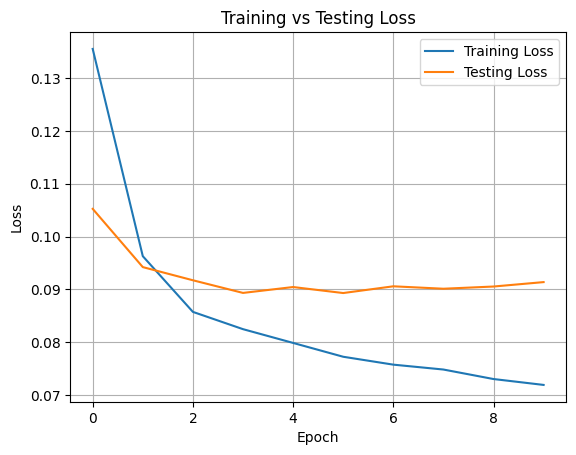

In [98]:
plt.plot(mod1.history['loss'], label='Training Loss')
plt.plot(mod1.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
    loss='mse',
    metrics=['mae']
)

mod2 = model2.fit(X_trn, y_trn, epochs=1000,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.6020 - mae: 0.7049 - val_loss: 0.3978 - val_mae: 0.5508
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3376 - mae: 0.4983 - val_loss: 0.2536 - val_mae: 0.4180
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2217 - mae: 0.3894 - val_loss: 0.1816 - val_mae: 0.3503
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1597 - mae: 0.3276 - val_loss: 0.1451 - val_mae: 0.3155
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1272 - mae: 0.2934 - val_loss: 0.1265 - val_mae: 0.2965
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1138 - mae: 0.2818 - val_loss: 0.1167 - val_mae: 0.2867
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1059 - mae: 0.2747 - val_loss: 0.1116 - val_mae: 0.2814
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1022 - mae: 0.2682 - val_loss: 0.1088 - val_mae: 0.2785
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

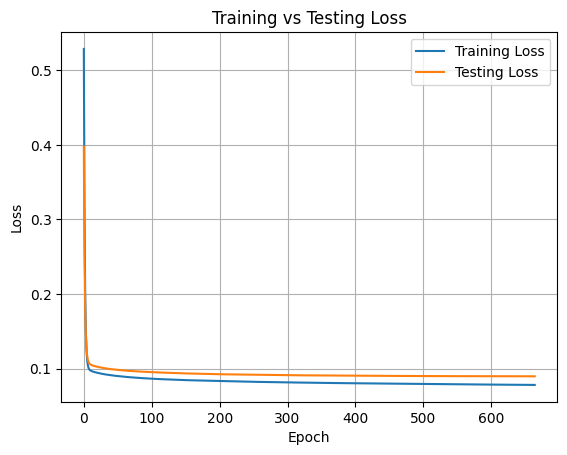

In [100]:
mod2.history

plt.plot(mod2.history['loss'], label='Training Loss')
plt.plot(mod2.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model3.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.005),
    loss='mse',
    metrics=['mae']
)

mod3 = model3.fit(X_trn, y_trn, epochs=1000,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3000 - mae: 0.4565 - val_loss: 0.1739 - val_mae: 0.3409
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1502 - mae: 0.3166 - val_loss: 0.1282 - val_mae: 0.2960
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1132 - mae: 0.2807 - val_loss: 0.1154 - val_mae: 0.2838
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1022 - mae: 0.2689 - val_loss: 0.1115 - val_mae: 0.2807
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1009 - mae: 0.2683 - val_loss: 0.1097 - val_mae: 0.2793
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0961 - mae: 0.2619 - val_loss: 0.1088 - val_mae: 0.2785
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0991 - mae: 0.2666 - val_loss: 0.1081 - val_mae: 0.2778
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0973 - mae: 0.2642 - val_loss: 0.1074 - val_mae: 0.2772
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

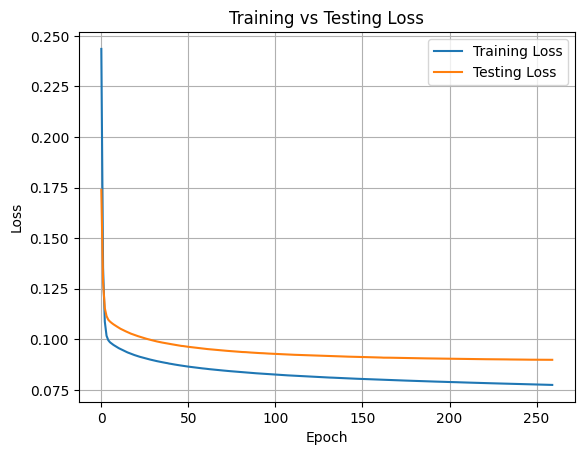

In [102]:
plt.plot(mod3.history['loss'], label='Training Loss')
plt.plot(mod3.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

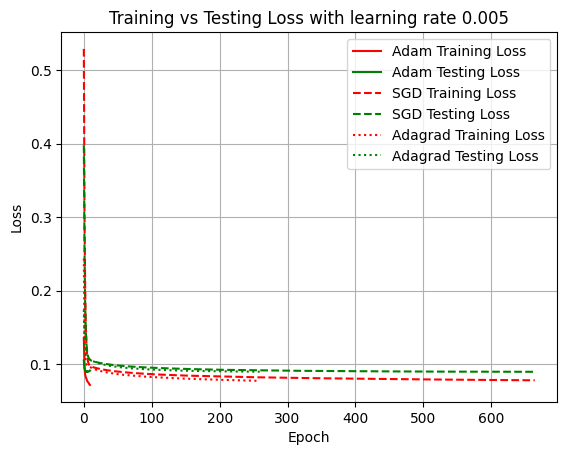

In [103]:
plt.plot(mod1.history['loss'], label='Adam Training Loss',ls="-",c="red")
plt.plot(mod1.history['val_loss'], label='Adam Testing Loss',ls="-",c="green")
plt.plot(mod2.history['loss'], label='SGD Training Loss',ls="--",c="red")
plt.plot(mod2.history['val_loss'], label='SGD Testing Loss',ls="--",c="green")
plt.plot(mod3.history['loss'], label='Adagrad Training Loss',ls=":",c="red")
plt.plot(mod3.history['val_loss'], label='Adagrad Testing Loss',ls=":",c="green")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss with learning rate 0.005')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
adam1 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

adam1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

adam_mod1 = adam1.fit(X_trn, y_trn, epochs=200,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.1808 - mae: 0.3452 - val_loss: 0.1228 - val_mae: 0.2910
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1118 - mae: 0.2768 - val_loss: 0.1040 - val_mae: 0.2730
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0941 - mae: 0.2589 - val_loss: 0.1015 - val_mae: 0.2718
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0927 - mae: 0.2593 - val_loss: 0.0965 - val_mae: 0.2651
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0888 - mae: 0.2544 - val_loss: 0.0955 - val_mae: 0.2655
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0847 - mae: 0.2478 - val_loss: 0.0949 - val_mae: 0.2652
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0843 - mae: 0.2496 - val_loss: 0.0941 - val_mae: 0.2642
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0807 - mae: 0.2425 - val_loss: 0.0940 - val_mae: 0.2645
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - lo

In [105]:
adam2 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

adam2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mae']
)

adam_mod2 = adam2.fit(X_trn, y_trn, epochs=200,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4682 - mae: 0.6138 - val_loss: 0.2837 - val_mae: 0.4488
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2254 - mae: 0.3923 - val_loss: 0.1426 - val_mae: 0.3106
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1202 - mae: 0.2858 - val_loss: 0.1095 - val_mae: 0.2790
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1022 - mae: 0.2686 - val_loss: 0.1099 - val_mae: 0.2799
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0982 - mae: 0.2614 - val_loss: 0.1036 - val_mae: 0.2725
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0952 - mae: 0.2608 - val_loss: 0.1009 - val_mae: 0.2691
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0932 - mae: 0.2594 - val_loss: 0.0997 - val_mae: 0.2676
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0916 - mae: 0.2585 - val_loss: 0.0980 - val_mae: 0.2658
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

In [106]:
adam3 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

adam3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

adam_mod3 = adam3.fit(X_trn, y_trn, epochs=200,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4027 - mae: 0.5385 - val_loss: 0.3579 - val_mae: 0.5075
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3533 - mae: 0.4999 - val_loss: 0.3049 - val_mae: 0.4625
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2892 - mae: 0.4480 - val_loss: 0.2609 - val_mae: 0.4234
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2554 - mae: 0.4181 - val_loss: 0.2252 - val_mae: 0.3909
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2183 - mae: 0.3802 - val_loss: 0.1971 - val_mae: 0.3642
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1902 - mae: 0.3554 - val_loss: 0.1754 - val_mae: 0.3439
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1614 - mae: 0.3256 - val_loss: 0.1595 - val_mae: 0.3285
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1530 - mae: 0.3217 - val_loss: 0.1480 - val_mae: 0.3168
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - lo

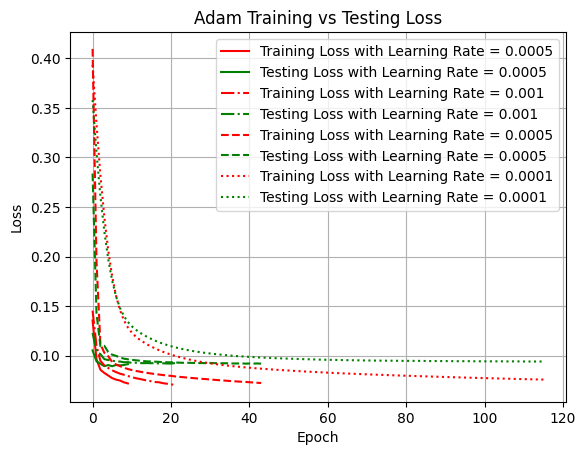

In [107]:
plt.plot(mod1.history['loss'], label='Training Loss with Learning Rate = 0.0005',ls="-",c="red")
plt.plot(mod1.history['val_loss'], label='Testing Loss with Learning Rate = 0.0005',ls="-",c="green")
plt.plot(adam_mod1.history['loss'], label='Training Loss with Learning Rate = 0.001',ls="-.",c="red")
plt.plot(adam_mod1.history['val_loss'], label='Testing Loss with Learning Rate = 0.001',ls="-.",c="green")
plt.plot(adam_mod2.history['loss'], label='Training Loss with Learning Rate = 0.0005',ls="--",c="red")
plt.plot(adam_mod2.history['val_loss'], label='Testing Loss with Learning Rate = 0.0005',ls="--",c="green")
plt.plot(adam_mod3.history['loss'], label='Training Loss with Learning Rate = 0.0001',ls=":",c="red")
plt.plot(adam_mod3.history['val_loss'], label='Testing Loss with Learning Rate = 0.0001',ls=":",c="green")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Adam Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
sgd1 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

sgd1.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

sgd_mod1 = sgd1.fit(X_trn, y_trn, epochs=600,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1495 - mae: 0.3195 - val_loss: 0.1190 - val_mae: 0.2862
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1135 - mae: 0.2826 - val_loss: 0.1079 - val_mae: 0.2737
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1034 - mae: 0.2725 - val_loss: 0.1053 - val_mae: 0.2708
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0998 - mae: 0.2659 - val_loss: 0.1039 - val_mae: 0.2694
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0982 - mae: 0.2643 - val_loss: 0.1029 - val_mae: 0.2683
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0970 - mae: 0.2641 - val_loss: 0.1020 - val_mae: 0.2675
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1014 - mae: 0.2692 - val_loss: 0.1013 - val_mae: 0.2666
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0957 - mae: 0.2596 - val_loss: 0.1006 - val_mae: 0.2659
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss

In [109]:
sgd2 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

sgd2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='mse',
    metrics=['mae']
)

sgd_mod2 = sgd2.fit(X_trn, y_trn, epochs=1000,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1336 - mae: 0.3007 - val_loss: 0.1108 - val_mae: 0.2788
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1037 - mae: 0.2717 - val_loss: 0.1025 - val_mae: 0.2696
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0976 - mae: 0.2651 - val_loss: 0.0982 - val_mae: 0.2648
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0918 - mae: 0.2565 - val_loss: 0.0960 - val_mae: 0.2623
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0892 - mae: 0.2542 - val_loss: 0.0943 - val_mae: 0.2606
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0879 - mae: 0.2541 - val_loss: 0.0935 - val_mae: 0.2597
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0872 - mae: 0.2532 - val_loss: 0.0923 - val_mae: 0.2589
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0898 - mae: 0.2573 - val_loss: 0.0918 - val_mae: 0.2587
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/

In [110]:
sgd3 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

sgd3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='mse',
    metrics=['mae']
)

sgd_mod3 = sgd3.fit(X_trn, y_trn, epochs=600,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.3391 - mae: 0.9752 - val_loss: 0.2168 - val_mae: 0.3835
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1511 - mae: 0.3183 - val_loss: 0.1116 - val_mae: 0.2828
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1098 - mae: 0.2768 - val_loss: 0.1068 - val_mae: 0.2743
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0952 - mae: 0.2620 - val_loss: 0.0937 - val_mae: 0.2622
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0888 - mae: 0.2563 - val_loss: 0.0951 - val_mae: 0.2642
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0853 - mae: 0.2515 - val_loss: 0.0918 - val_mae: 0.2595
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0864 - mae: 0.2537 - val_loss: 0.0925 - val_mae: 0.2599
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0861 - mae: 0.2516 - val_loss: 0.0901 - val_mae: 0.2581
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - lo

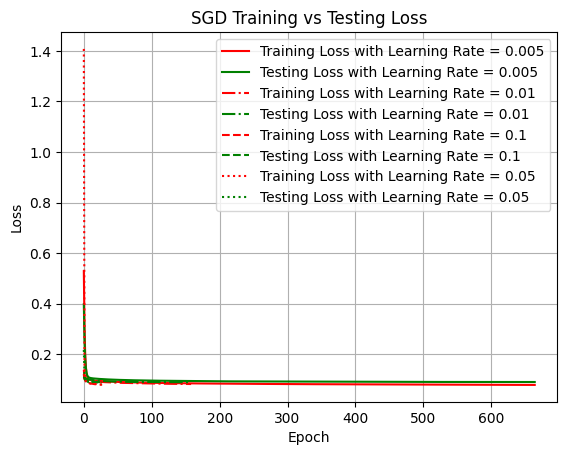

In [112]:
plt.plot(mod2.history['loss'], label='Training Loss with Learning Rate = 0.005',ls="-",c="red")
plt.plot(mod2.history['val_loss'], label='Testing Loss with Learning Rate = 0.005',ls="-",c="green")
plt.plot(sgd_mod1.history['loss'], label='Training Loss with Learning Rate = 0.01',ls="-.",c="red")
plt.plot(sgd_mod1.history['val_loss'], label='Testing Loss with Learning Rate = 0.01',ls="-.",c="green")
plt.plot(sgd_mod2.history['loss'], label='Training Loss with Learning Rate = 0.1',ls="--",c="red")
plt.plot(sgd_mod2.history['val_loss'], label='Testing Loss with Learning Rate = 0.1',ls="--",c="green")
plt.plot(sgd_mod3.history['loss'], label='Training Loss with Learning Rate = 0.05',ls=":",c="red")
plt.plot(sgd_mod3.history['val_loss'], label='Testing Loss with Learning Rate = 0.05',ls=":",c="green")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
ada1 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

ada1.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

ada_mod1 = ada1.fit(X_trn, y_trn, epochs=600,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/600


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1356 - mae: 0.3004 - val_loss: 0.1109 - val_mae: 0.2768
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1059 - mae: 0.2742 - val_loss: 0.1074 - val_mae: 0.2733
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1016 - mae: 0.2672 - val_loss: 0.1052 - val_mae: 0.2710
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0972 - mae: 0.2621 - val_loss: 0.1035 - val_mae: 0.2694
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0977 - mae: 0.2646 - val_loss: 0.1020 - val_mae: 0.2678
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0945 - mae: 0.2599 - val_loss: 0.1010 - val_mae: 0.2669
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0953 - mae: 0.2631 - val_loss: 0.1000 - val_mae: 0.2659
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0906 - mae: 0.2536 - val_loss: 0.0992 - val_mae: 0.2650
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0906 - ma

In [114]:
ada2 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

ada2.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1),
    loss='mse',
    metrics=['mae']
)

ada_mod2 = ada2.fit(X_trn, y_trn, epochs=1000,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1146 - mae: 0.2832 - val_loss: 0.0959 - val_mae: 0.2656
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0875 - mae: 0.2536 - val_loss: 0.0919 - val_mae: 0.2596
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0866 - mae: 0.2544 - val_loss: 0.0907 - val_mae: 0.2582
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0855 - mae: 0.2529 - val_loss: 0.0913 - val_mae: 0.2593
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0814 - mae: 0.2444 - val_loss: 0.0892 - val_mae: 0.2565
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0834 - mae: 0.2492 - val_loss: 0.0889 - val_mae: 0.2552
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0812 - mae: 0.2448 - val_loss: 0.0886 - val_mae: 0.2549
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0786 - mae: 0.2412 - val_loss: 0.0888 - val_mae: 0.2559
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [115]:
ada3 = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dense(32, activation='relu'),
    Dense(1)
])

ada3.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.05),
    loss='mse',
    metrics=['mae']
)

ada_mod3 = sgd3.fit(X_trn, y_trn, epochs=600,
          batch_size=200,
          validation_data=(X_tst, y_tst),
          callbacks=[early_stop]
)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0783 - mae: 0.2407 - val_loss: 0.0877 - val_mae: 0.2546
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0795 - mae: 0.2434 - val_loss: 0.0880 - val_mae: 0.2537
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0811 - mae: 0.2449 - val_loss: 0.0884 - val_mae: 0.2540
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0828 - mae: 0.2485 - val_loss: 0.0867 - val_mae: 0.2525
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0824 - mae: 0.2477 - val_loss: 0.0923 - val_mae: 0.2603
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0836 - mae: 0.2481 - val_loss: 0.0870 - val_mae: 0.2524
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0806 - mae: 0.2448 - val_loss: 0.0871 - val_mae: 0.2527
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0766 - mae: 0.2374 - val_loss: 0.0871 - val_mae: 0.2533


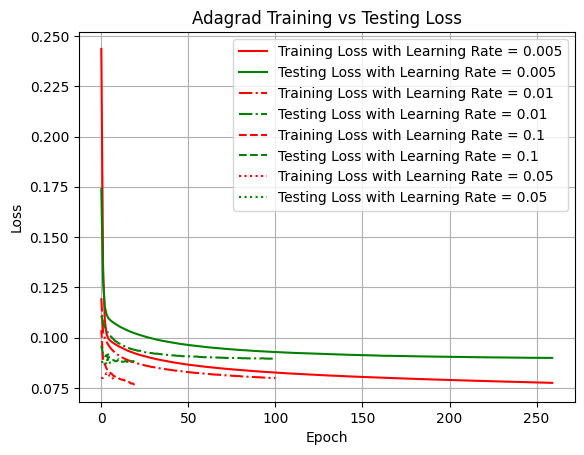

In [116]:
plt.plot(mod3.history['loss'], label='Training Loss with Learning Rate = 0.005',ls="-",c="red")
plt.plot(mod3.history['val_loss'], label='Testing Loss with Learning Rate = 0.005',ls="-",c="green")
plt.plot(ada_mod1.history['loss'], label='Training Loss with Learning Rate = 0.01',ls="-.",c="red")
plt.plot(ada_mod1.history['val_loss'], label='Testing Loss with Learning Rate = 0.01',ls="-.",c="green")
plt.plot(ada_mod2.history['loss'], label='Training Loss with Learning Rate = 0.1',ls="--",c="red")
plt.plot(ada_mod2.history['val_loss'], label='Testing Loss with Learning Rate = 0.1',ls="--",c="green")
plt.plot(ada_mod3.history['loss'], label='Training Loss with Learning Rate = 0.05',ls=":",c="red")
plt.plot(ada_mod3.history['val_loss'], label='Testing Loss with Learning Rate = 0.05',ls=":",c="green")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Adagrad Training vs Testing Loss')
plt.legend()
plt.grid(True)
plt.show()